In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#Loading the dataset
data = pd.read_csv("tiktok_dataset.csv")
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [15]:
#Pulling basic info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [16]:
#Getting number of null values in each column
data.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [17]:
#Dropping null values
data = data.dropna()

In [18]:
#Creating a copy of the cleaned data
data_cp = data.copy()

In [19]:
#Feature Engineering: Creating a new feature 'text_length' to store the length of video transcription text
data_cp['text_length'] = data_cp['video_transcription_text'].apply(len)

C:\Users\there\AppData\Local\Temp\ipykernel_22668\539067934.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='claim_status', data=data_cp, palette='viridis')


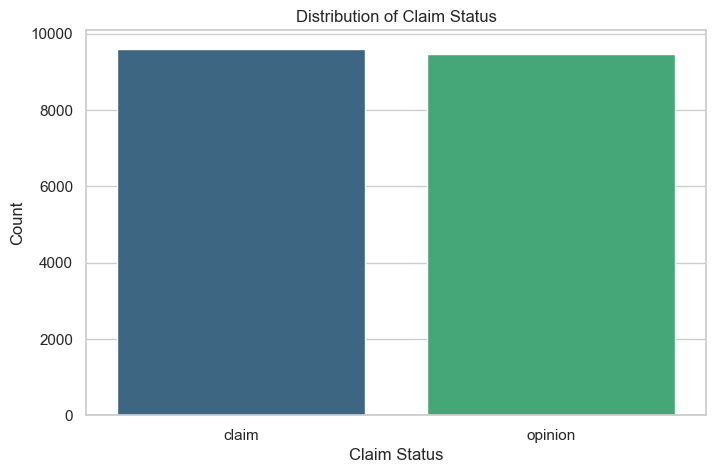

In [20]:
sns.set(style="whitegrid")

#Plot 1: Claim Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='claim_status', data=data_cp, palette='viridis')
plt.title('Distribution of Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()


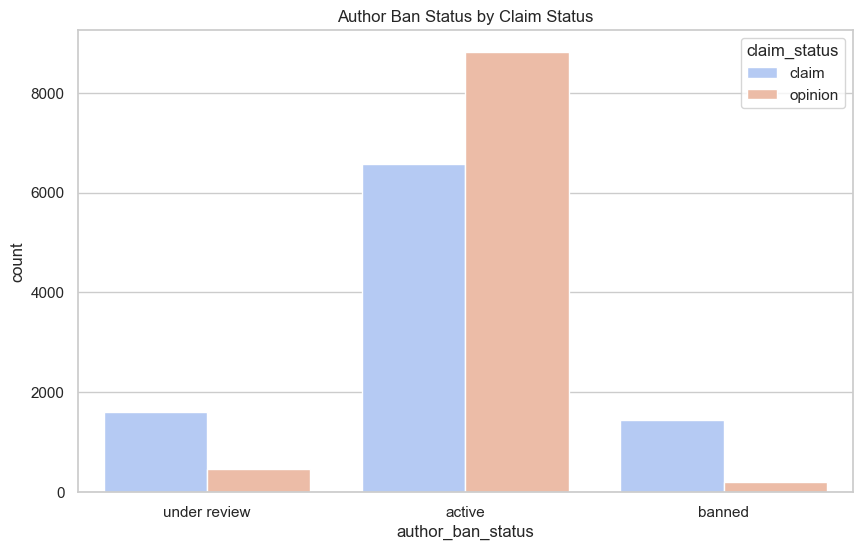

In [21]:
# Plot 2: Ban Status by Claim Type
plt.figure(figsize=(10, 6))
sns.countplot(x='author_ban_status', hue='claim_status', data=data_cp, palette='coolwarm')
plt.title('Author Ban Status by Claim Status')
plt.show()

C:\Users\there\AppData\Local\Temp\ipykernel_22668\4146890546.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='claim_status', y='video_view_count', data=data_cp, palette='Set2')


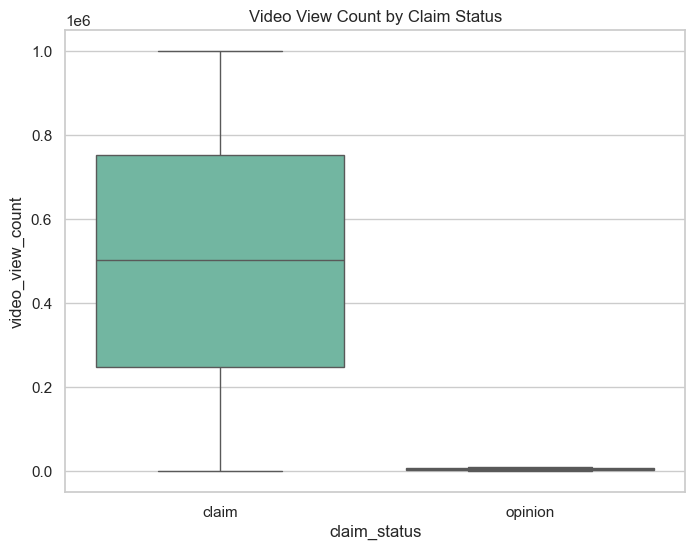

In [22]:
# Plot 3: Views by Claim Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='claim_status', y='video_view_count', data=data_cp, palette='Set2')
plt.title('Video View Count by Claim Status')
plt.show()

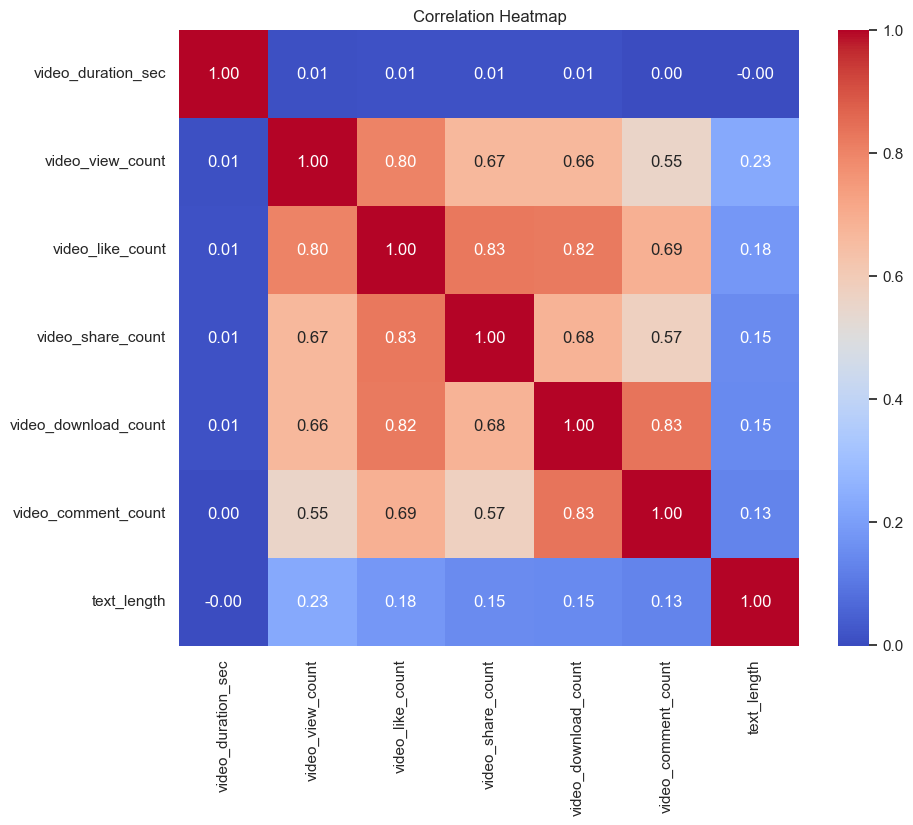

In [23]:
# Plot 4: Correlation Heatmap
plt.figure(figsize=(10, 8))
numeric_cols = ['video_duration_sec', 'video_view_count', 'video_like_count', 
                'video_share_count', 'video_download_count', 'video_comment_count', 'text_length']
corr_matrix = data_cp[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()